In [75]:
### Importing libraries
import pandas as pd
import numpy as np
import os
from datetime import datetime
#from lightgbm import LGBMRegressor
#import gresearch_crypto
import traceback
import time
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from itertools import product
from pandas_profiling import ProfileReport


In [31]:
df1=pd.read_csv('low.csv')
df2=pd.read_csv('adj_close.csv')
df3=pd.read_csv('close.csv')
df4=pd.read_csv('high.csv')
df5=pd.read_csv('open.csv')
df5=pd.read_csv('volume.csv')
df=df1+df2+df3+df4+df5

df.set_index('Date',inplace=True)

# DATA EXPLORATION

In [37]:
df.head()

,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
Date,,,,,,,,,,
2017-04-262017-04-262017-04-262017-04-262017-04-26,NaN,NaN,NaN,NaN,3.296361e+08,NaN,NaN,NaN,NaN,NaN
2017-04-272017-04-272017-04-272017-04-272017-04-27,NaN,NaN,NaN,NaN,4.492022e+08,NaN,NaN,NaN,NaN,NaN
2017-04-282017-04-282017-04-282017-04-282017-04-28,NaN,NaN,NaN,NaN,5.274942e+08,NaN,NaN,NaN,NaN,NaN
2017-04-292017-04-292017-04-292017-04-292017-04-29,NaN,NaN,NaN,NaN,4.227113e+08,NaN,NaN,NaN,NaN,NaN
2017-04-302017-04-302017-04-302017-04-302017-04-30,NaN,NaN,NaN,NaN,4.131204e+08,NaN,NaN,NaN,NaN,NaN


In [38]:
df.isna().sum()

ADA-USD       197
ATOM-USD      687
AVAX-USD     1243
AXS-USD      1288
BTC-USD         0
ETH-USD       197
LINK-USD      197
LUNA1-USD     821
MATIC-USD     732
SOL-USD      1080
dtype: int64

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1826 non-null   object 
 1   ADA-USD    1629 non-null   float64
 2   ATOM-USD   1139 non-null   float64
 3   AVAX-USD   583 non-null    float64
 4   AXS-USD    538 non-null    float64
 5   BTC-USD    1826 non-null   float64
 6   ETH-USD    1629 non-null   float64
 7   LINK-USD   1629 non-null   float64
 8   LUNA1-USD  1005 non-null   float64
 9   MATIC-USD  1094 non-null   float64
 10  SOL-USD    746 non-null    float64
dtypes: float64(10), object(1)
memory usage: 157.0+ KB


In [40]:
df.duplicated().sum()

0

In [41]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ADA-USD,1629.0,1.204915e+09,2.182599e+09,2.930550e+06,6.533307e+07,1.959541e+08,1.385060e+09,1.914198e+10
ATOM-USD,1139.0,4.468545e+08,5.348952e+08,2.567221e+06,1.373081e+08,2.356630e+08,5.647138e+08,4.260700e+09
AVAX-USD,583.0,6.225377e+08,6.693454e+08,3.976965e+03,7.044092e+07,3.689777e+08,1.009784e+09,3.379297e+09
AXS-USD,538.0,4.358643e+08,7.423603e+08,5.796279e+05,2.186774e+07,2.372679e+08,5.276083e+08,6.680962e+09
BTC-USD,1826.0,2.276139e+10,2.063462e+10,3.296361e+08,5.586139e+09,1.904231e+10,3.344640e+10,3.509681e+11
ETH-USD,1629.0,1.252478e+10,1.114218e+10,6.217343e+08,3.298281e+09,9.766633e+09,1.776814e+10,8.448292e+10
LINK-USD,1629.0,7.841433e+08,4.314155e+09,3.987738e+05,8.182736e+06,2.240961e+08,1.073605e+09,1.705493e+11
LUNA1-USD,1005.0,5.790606e+08,1.001971e+09,1.705339e+05,3.319205e+06,1.962408e+07,7.414480e+08,6.147403e+09
MATIC-USD,1094.0,5.387260e+08,9.962211e+08,2.938835e+06,1.772250e+07,5.196713e+07,7.551255e+08,9.181248e+09
SOL-USD,746.0,1.104108e+09,1.658926e+09,6.520223e+05,1.290409e+07,3.182849e+08,1.867558e+09,1.706864e+10


In [42]:
df.dtypes

ADA-USD      float64
ATOM-USD     float64
AVAX-USD     float64
AXS-USD      float64
BTC-USD      float64
ETH-USD      float64
LINK-USD     float64
LUNA1-USD    float64
MATIC-USD    float64
SOL-USD      float64
dtype: object

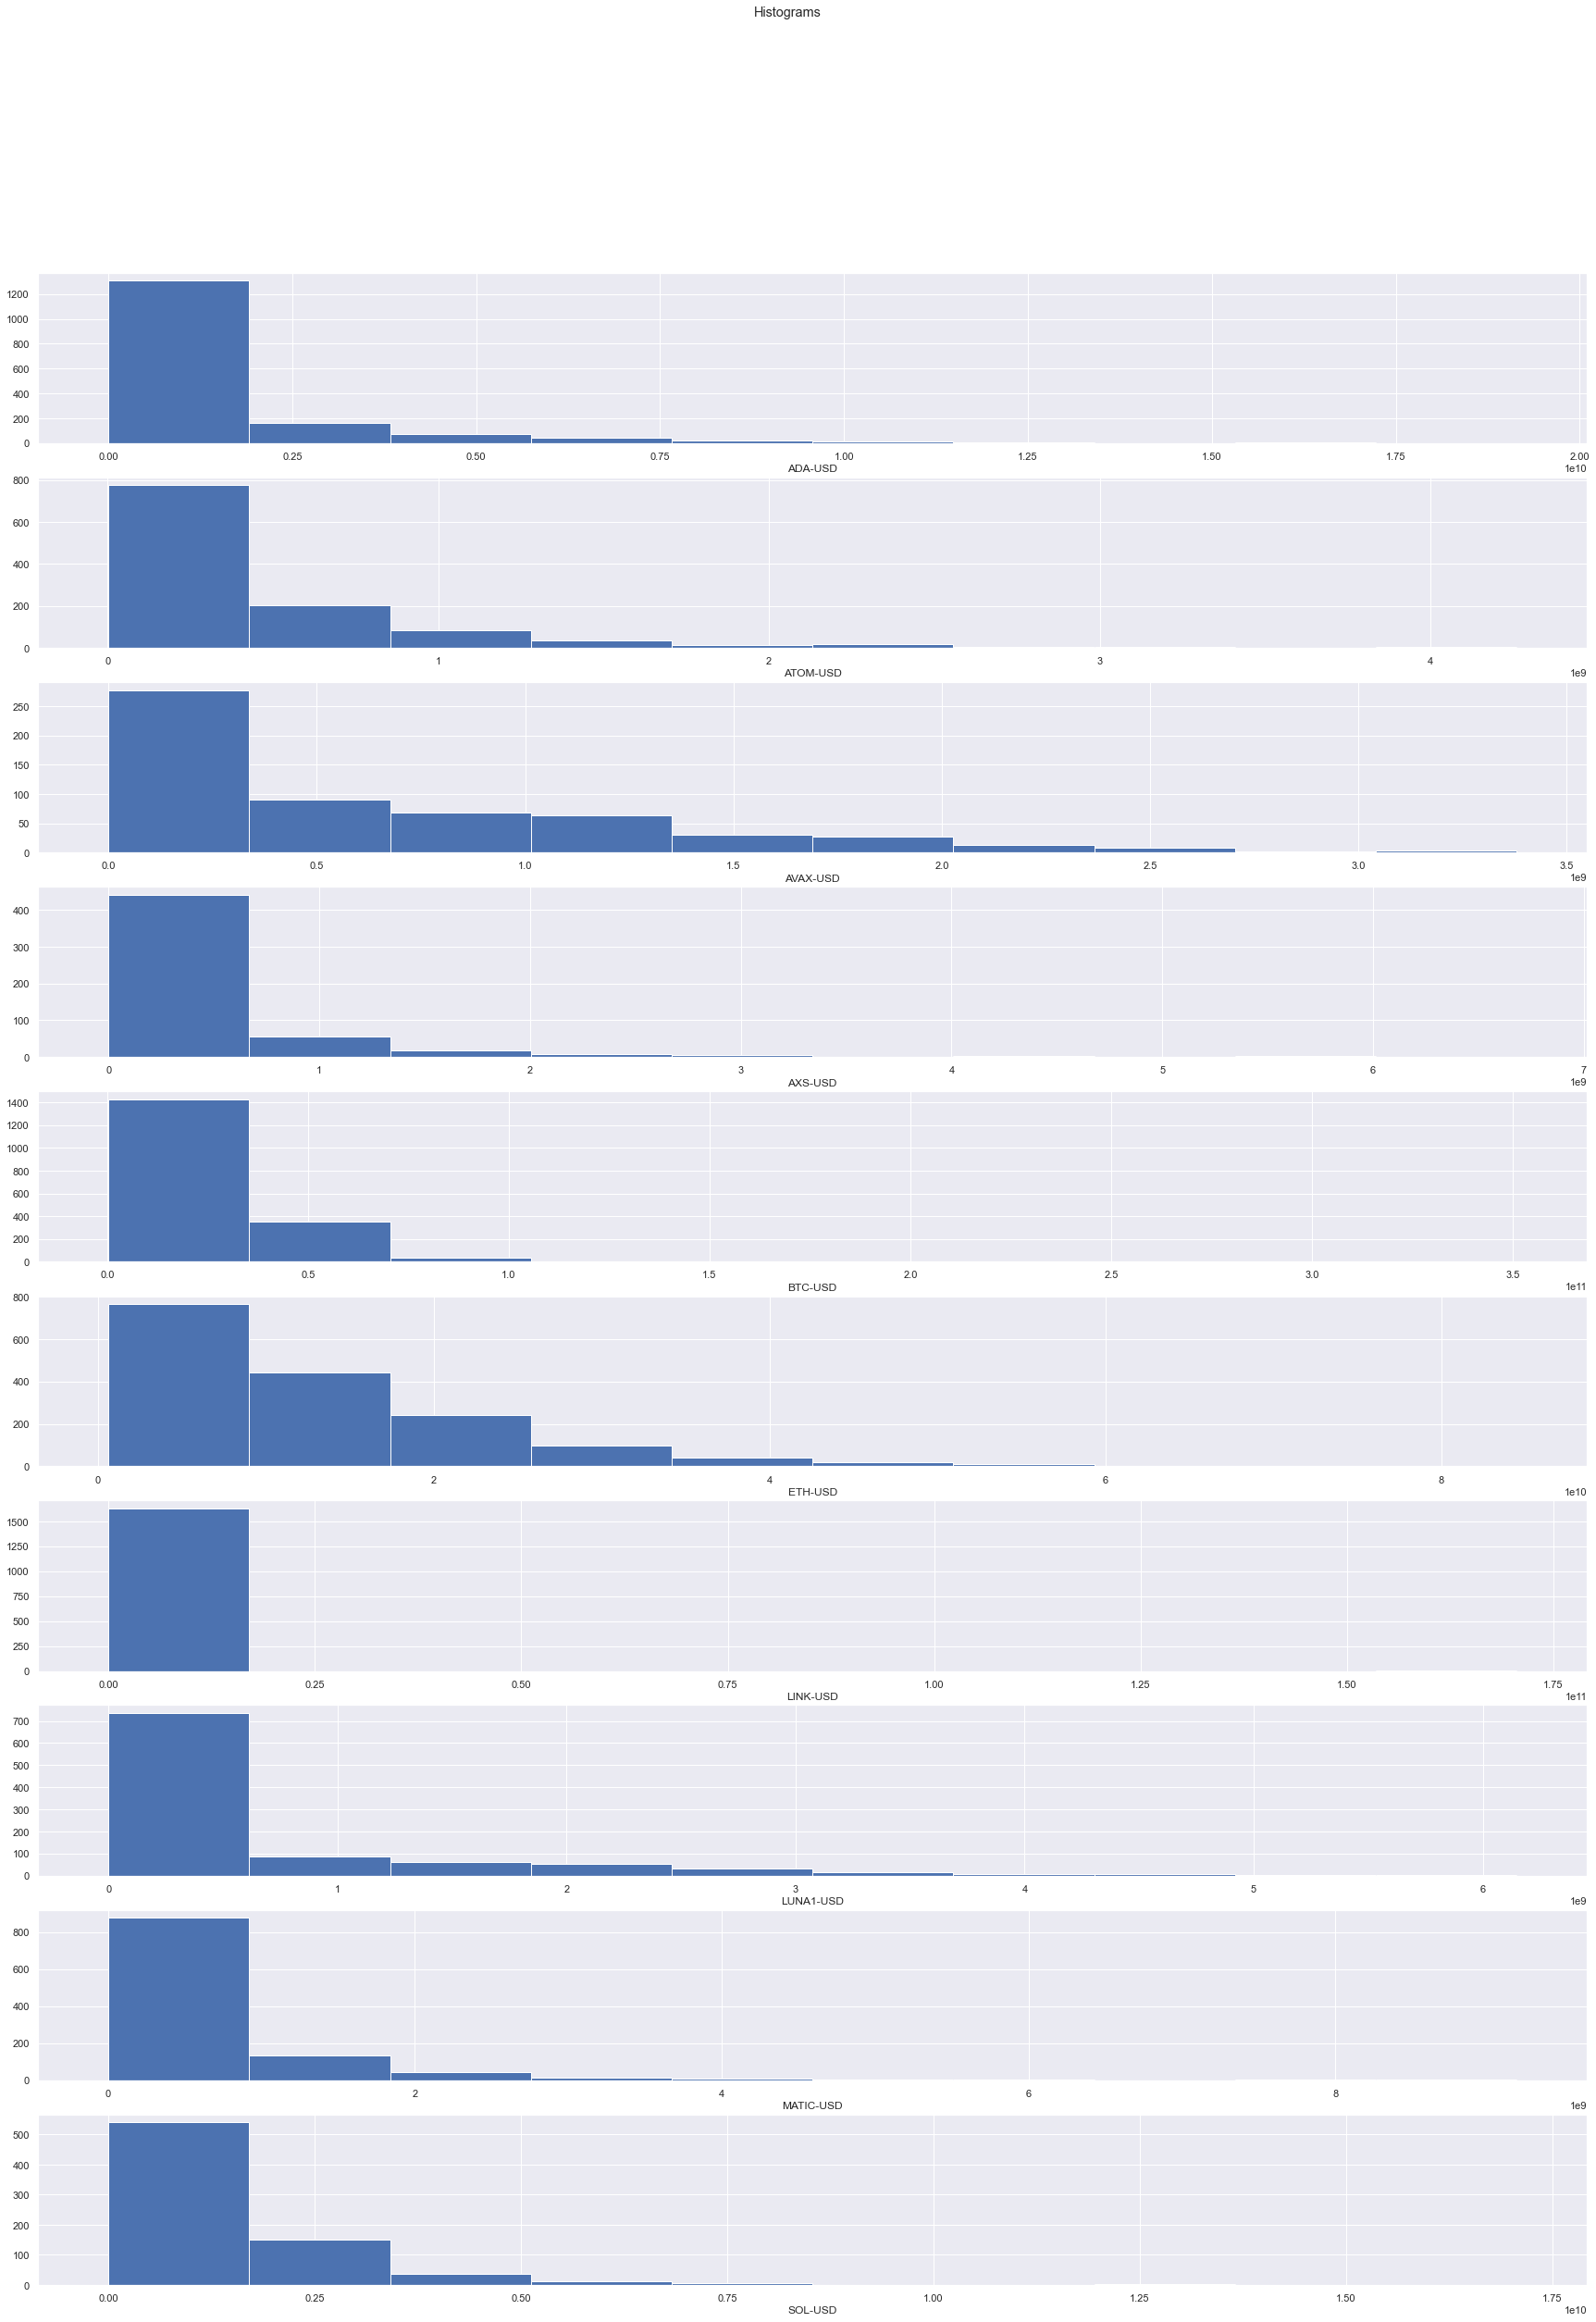

In [51]:
sns.set()

fig, axes = plt.subplots(10, figsize=(30, 40))

for ax, feat in zip(axes.flatten(), df): 
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.2)
    

title = "Histograms"

plt.suptitle(title)

plt.savefig(os.path.join('histograms.png'), dpi=200)
plt.show()

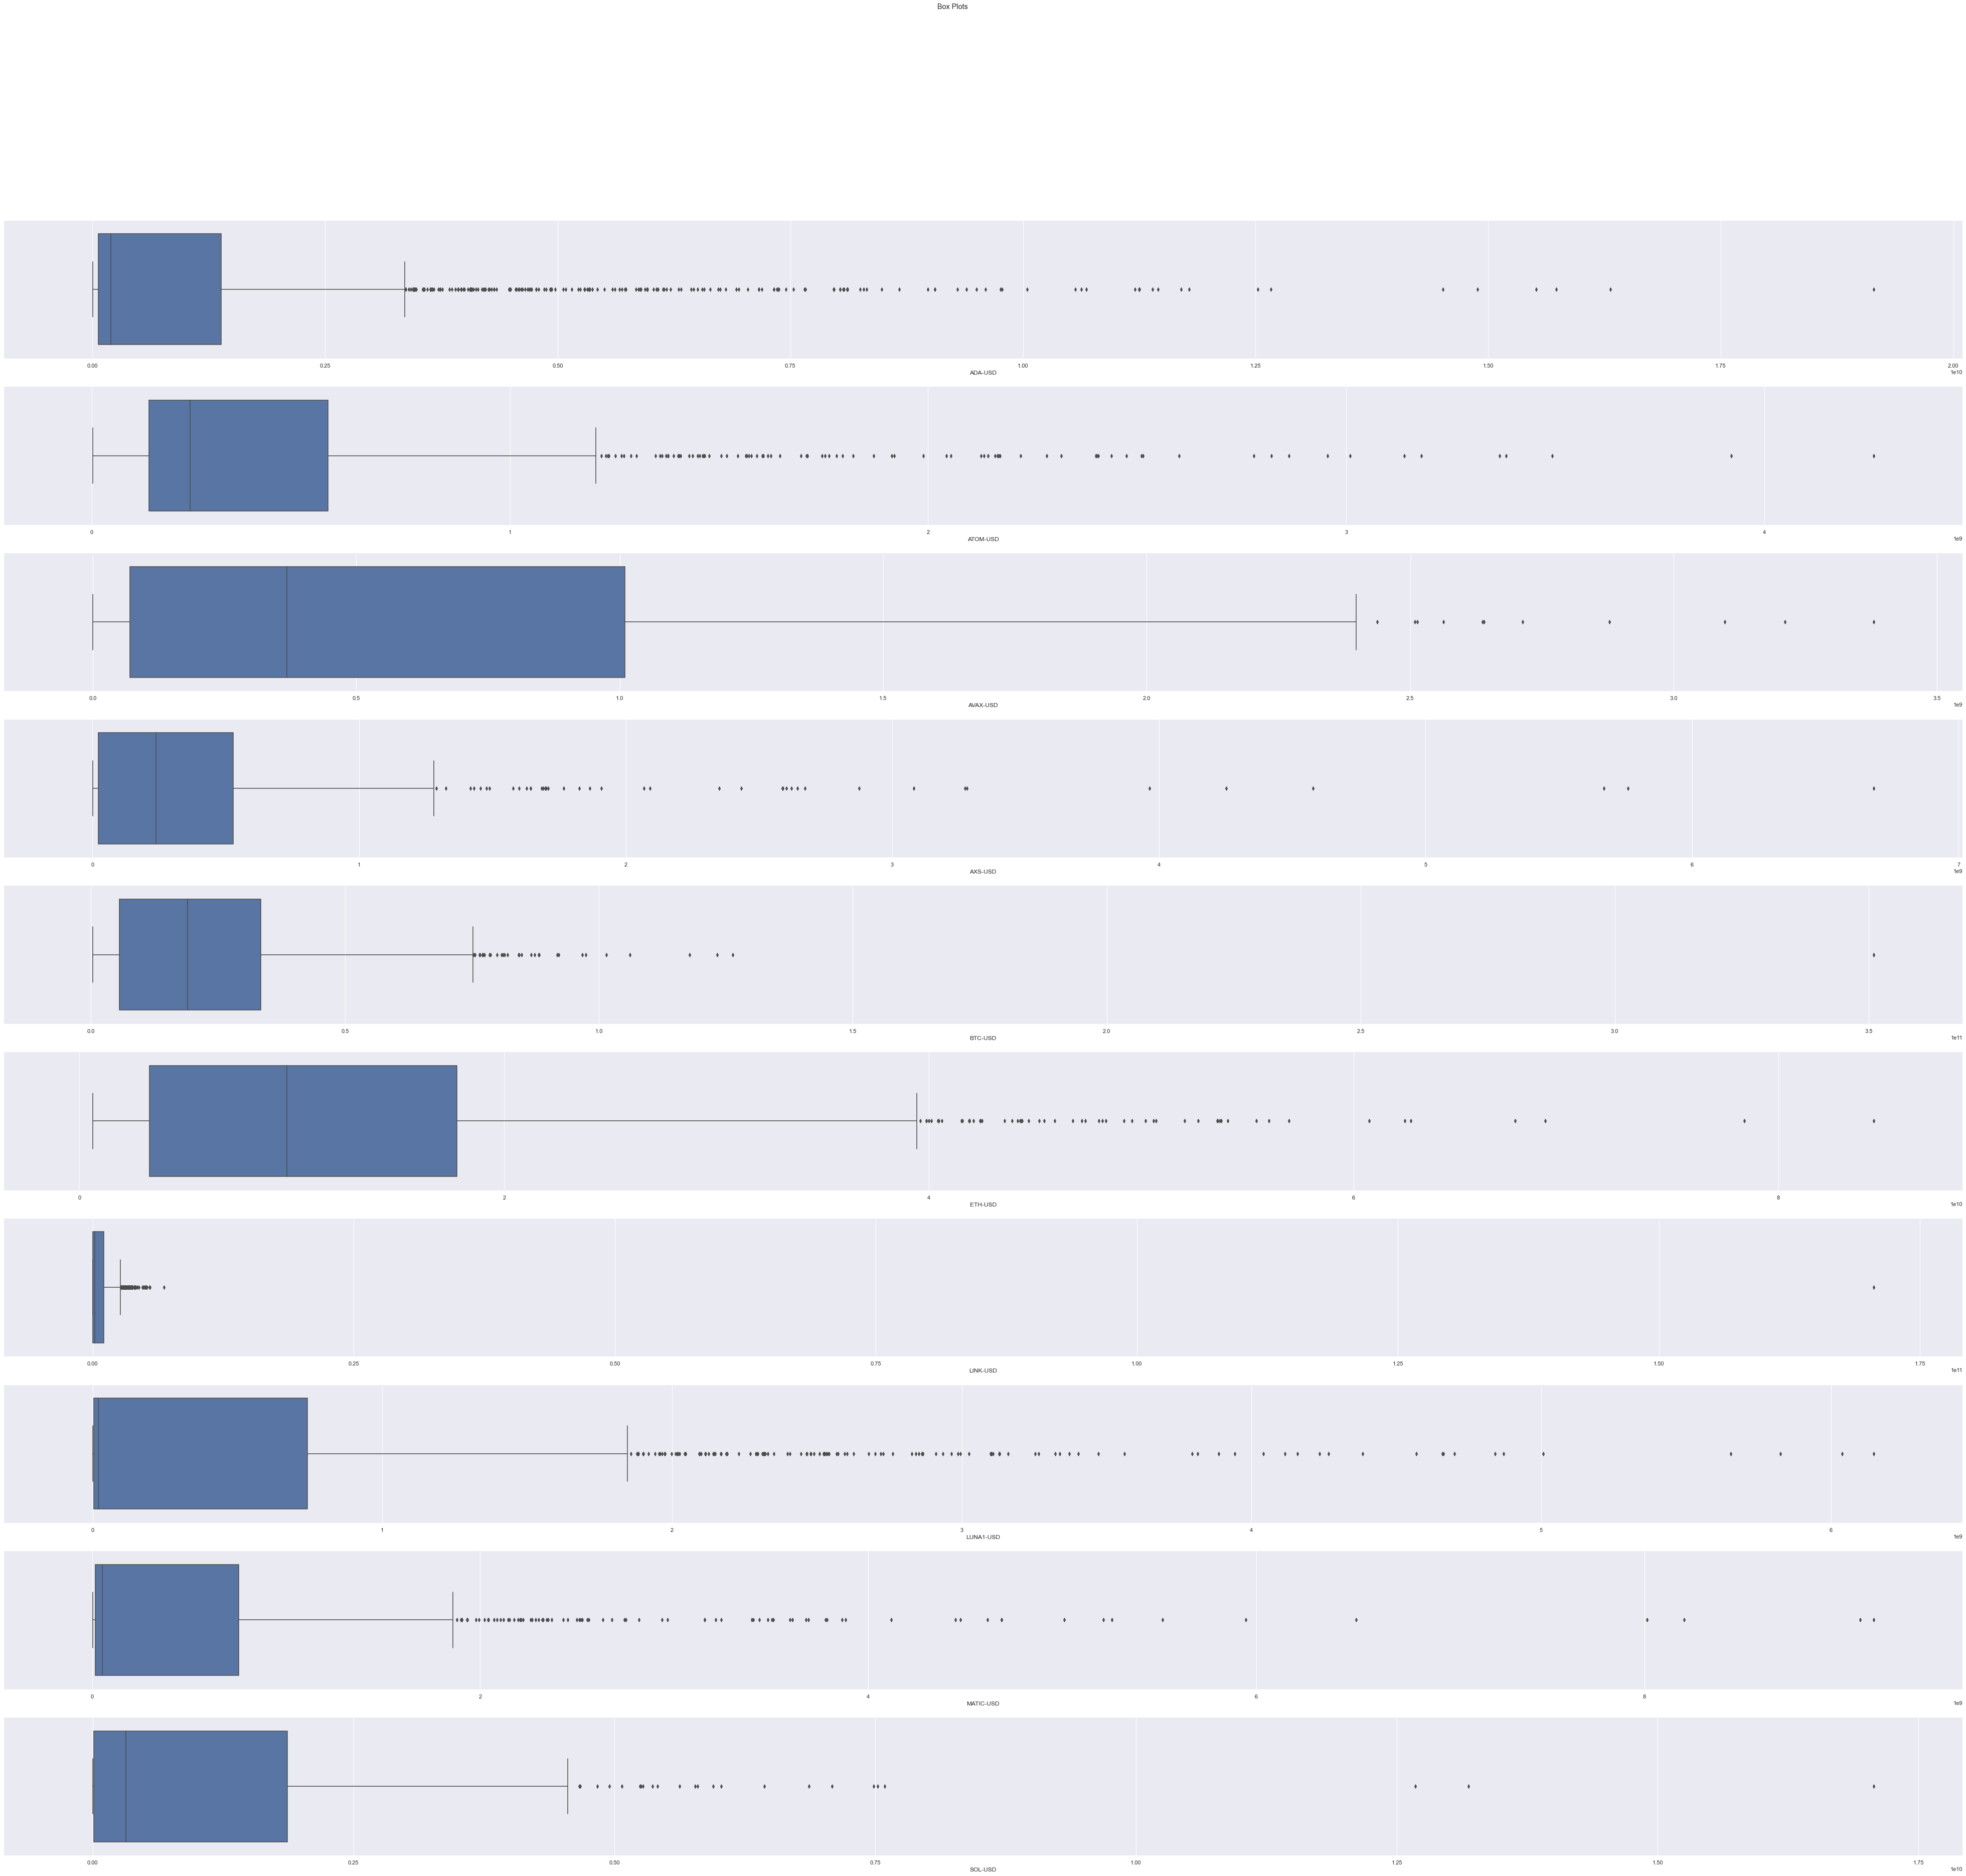

In [65]:
sns.set()

fig, axes = plt.subplots((10), figsize=(70, 60))

for ax, feat in zip(axes.flatten(), df): 
    sns.boxplot(x=df[feat], ax=ax)
    

title = " Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join('boxplots.png'), dpi=200)
plt.show()

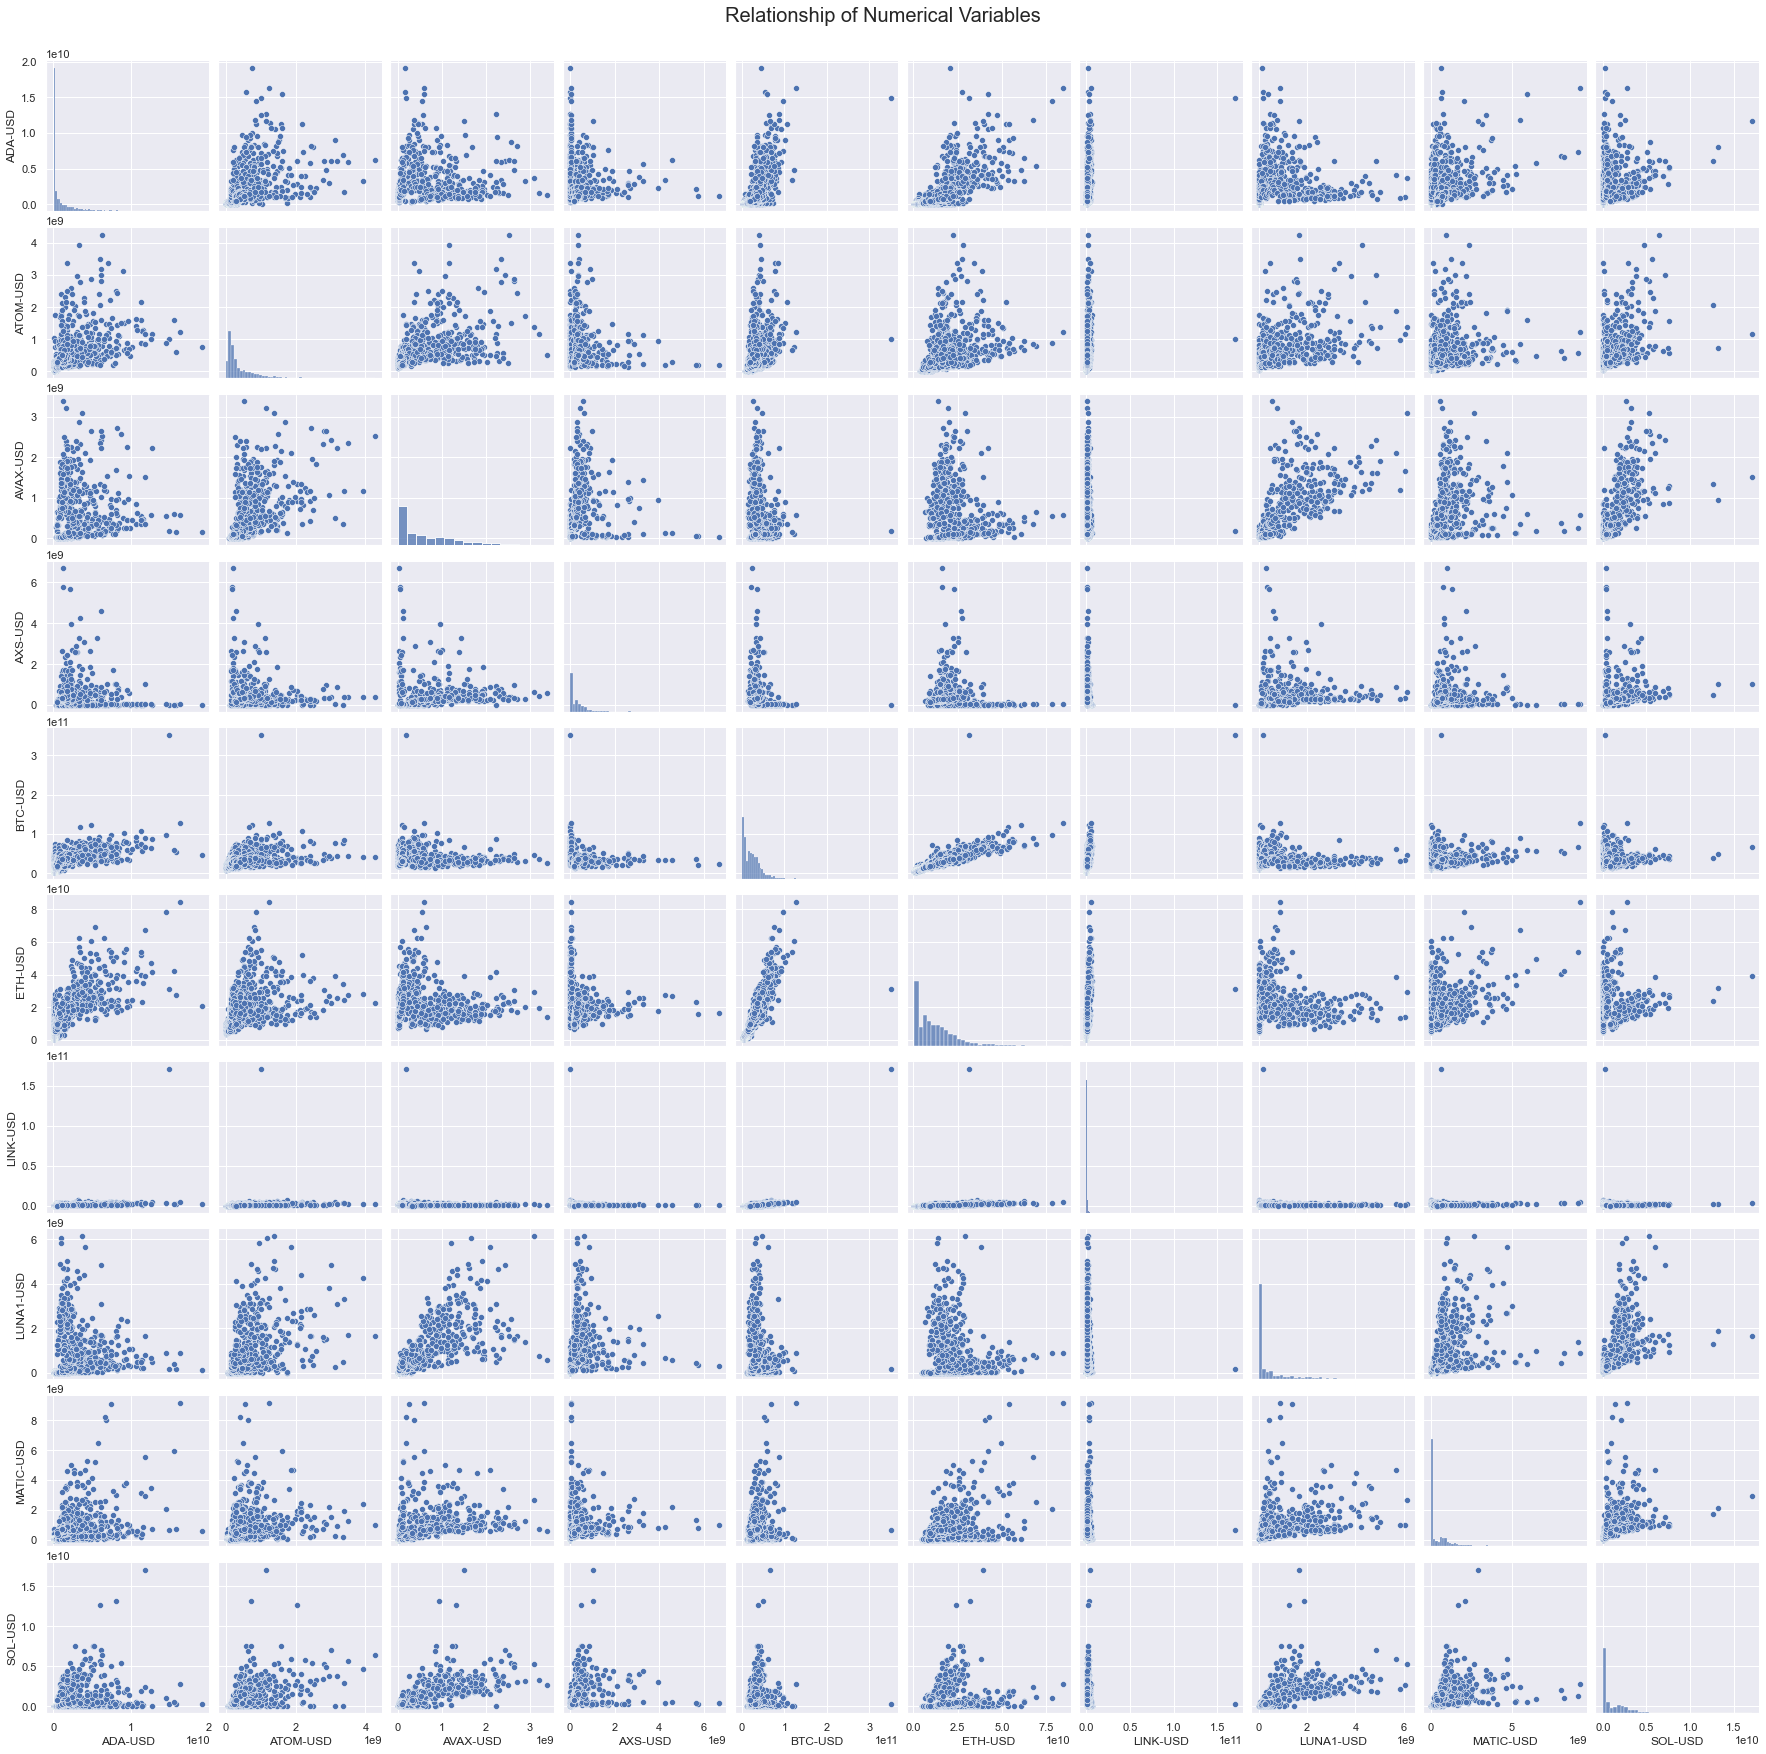

In [66]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df, diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Relationship of Numerical Variables", fontsize=20)

plt.savefig(os.path.join('relationship_of_numerical_variables.png'), dpi=200)
plt.show()

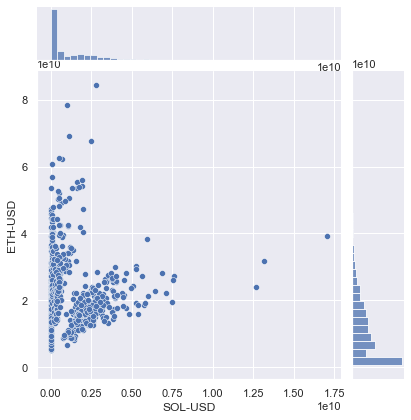

In [70]:
sns.jointplot(data=df, x="SOL-USD", y="ETH-USD")
plt.show()

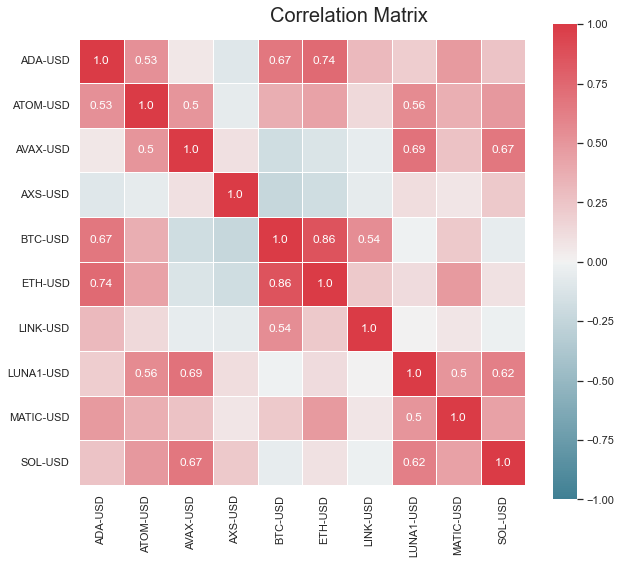

In [73]:
fig = plt.figure(figsize=(10, 8))

corr = np.round(df.corr(method="pearson"), decimals=2)

mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.savefig(os.path.join('correlation_matrix.png'), dpi=200)

plt.show()

In [84]:
q25 = df.quantile(.25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
for metric in df:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(df[metric].between(llim, ulim, inclusive=True))

df_2 = df[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(df.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 1.0


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_16012/447299808.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  filters.append(df[metric].between(llim, ulim, inclusive=True))
